# SGD and Backpropagation - Exercises

**NOTICE:**
1. You are allowed to work in groups of up to three people but **have to document** your group's\
 members in the top cell of your notebook.
2. **Comment your code**, explain what you do (refer to the slides). It will help you understand the topics\
 and help me understand your thinking progress. Quality of comments will be graded.
3. **Discuss** and analyze your results, **write-down your learnings**. These exercises are no programming\
 exercises it is about learning and getting a touch for these methods. Such questions might be asked in the\
 final exams.
 4. Feel free to **experiment** with these methods. Change parameters think about improvements, write down\
 what you learned. This is not only about collecting points for the final grade, it is about understanding\
  the methods.

### Exercise 1 - Gradient Descent


**Summary:** In this exercise you will implement the gradient descent algorithm. It will\
help you to gain a better understanding on how neural networks are trained.


**Provided Code:** In the cell below I have provided you with a function ``f()`` and the first\
derivative of ``f()`` denoted ``dfdx()``.


**Your Tasks in this exercise:**
1. Implement the gradient descent algorithm.
2. Plot and analyze your results.





In [2]:
#@title **Provided Code:** ``f()`` and ``dfdx()`` function.

import matplotlib.pyplot as plt
import numpy as np

    
def f(x):
    return x**2

def dfdx(x):
    return 2*x

In [7]:
def gradient_descent(learning_rate, f, dfdx):
    # initialize w0 randomly
    w0 = np.random.randn()*5
    w_old = w0
    # initialize plot
    fig, ax = plt.subplots()  
    ax.plot(np.arange(-5, 5, 0.1), f(np.arange(-5, 5, 0.1)))
    for i in range(10000):
        # plot point
        ax.plot(w_old, f(w_old), 'o', color='tab:red')
        # calculate derivative
        derivative = dfdx(w_old)
        # break if it is small enough
        if derivative < 0.001:
            ax.plot(w_old, f(w_old), 'o', color='tab:green')
            break

        # calculate new step
        w_new = w_old - learning_rate * derivative
        w_old = w_new
        
    return w_old
    

0.0004327617415812911

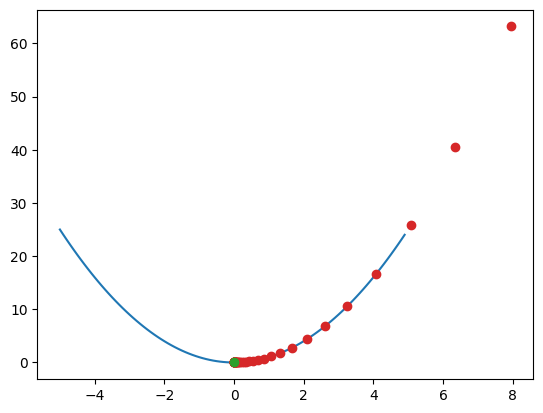

In [8]:
gradient_descent(0.1, f, dfdx)

### Exercise 2 - Gradient Descent with Momentum


**Summary:** In this exercise you will improve the gradient descent algorithm from the\
previous exercise to act using the momentum idea.


**Provided Code:** In the cell below I have provided you with a function ``g()``.


**Your Tasks in this exercise:**
1. Calculate the gradient of ``g()`` with respect to x.
2. Extend your implementation of gradient descent with momentum.
3. Try to find a minimum of ``g()``.
4. Answer the following questions:
    * What is a good value fo $\alpha$?
    * What is the impact of the initialization of your optimization (the starting point)?
    * Why do neural networks produce different results if trained multiple times?




first derivative:
−xe−x2(2sin(x3)−3xcos(x3)

In [12]:
# A non-convex function.
#
def g(x):
    return np.exp(-(x**2)) * np.sin(x**3)

def dgdx(x):
    return -x*np.exp(-(x**2))*(2*np.sin(x**3)-3*x*np.cos(x**3))

In [49]:
def gradient_descent_momentum(learning_rate, f, dfdx, w0 = np.random.randn()*5, alpha = 0.8, steps = 1000):

    # initialize plot
    fig, ax = plt.subplots()  
    ax.plot(np.arange(-5, 5, 0.1), f(np.arange(-5, 5, 0.1)))

    
    # initialize start values
    w_current = w0
    w_old = w0
    for i in range(steps):
        # plot point
        ax.plot(w_current, f(w_current), 'o', color='tab:red')
        # calculate derivative
        derivative = dfdx(w_old)
        # calculate delta
        delta = w_current - w_old
        
        ###
        # break if it is small enough
        #if derivative < 0.001:
            #ax.plot(w_old, f(w_old), 'o', color='tab:green')
            #break
        ###
        
        # calculate new step
        w_new = w_current - learning_rate * derivative + alpha * delta

        #update historic values
        w_old = w_current
        w_current = w_new
        
        if i == steps-1:
            ax.plot(w_current, f(w_current), 'o', color='tab:green')
        
    return w_old

-0.9931607033824221

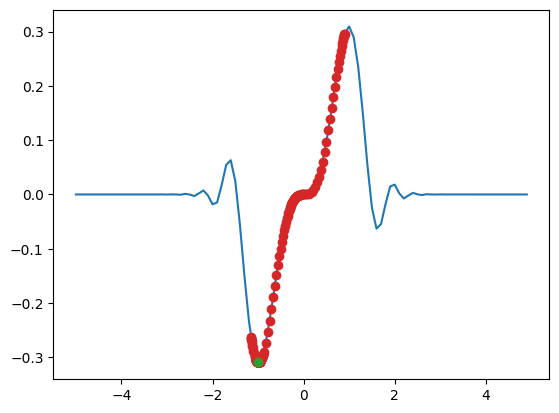

In [50]:
gradient_descent_momentum(learning_rate = 0.01, f = g,dfdx = dgdx, w0 = 0.9, alpha = 0.9, steps = 1000)